In [1]:
from google.colab import drive
#Decoding Customer Retention and Churn Predictive Analytics of Vodafone in KNUST

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Research Guidelines: Decoding Customer Retention and Churn - Predictive Analytics of Vodafone in KNUST (Survey Approach)

**Introduction:**

This research project aims to investigate customer churn and retention among Vodafone subscribers, specifically focusing on students at Kwame Nkrumah University of Science and Technology (KNUST). By conducting surveys and analyzing the collected data, we can understand the factors influencing churn and retention, allowing Vodafone to develop strategies to improve customer satisfaction and loyalty.

**Research Objectives:**

* Identify the key factors that contribute to student churn and retention for Vodafone through surveys.
* Develop a churn prediction model based on survey responses to identify students at risk of churning.
* Analyze the effectiveness of different strategies for reducing churn and increasing retention among students based on survey insights.

**Data Collection:**

* **Student Surveys:** Design and distribute surveys to a representative sample of students at KNUST. The survey should capture information on:
    * Demographics (age, program, year of study)
    * Vodafone subscription details (plan type, data usage)
    * Satisfaction with Vodafone services (price, network coverage, customer service)
    * Reasons for considering churn (if applicable)
    * Preferences for future plans or services

**Data Analysis Techniques:**

* **Statistical analysis:** Analyze survey responses to identify correlations between factors and churn/retention.
* **Logistic regression:**  Develop a churn prediction model based on survey responses. The model will identify students with characteristics associated with a higher likelihood of churning.
* **Segmentation analysis:** Segment students into groups based on their responses and churn risk. Analyze the characteristics of each segment to understand why some students are more likely to churn than others.

**Research Methodology:**

1. **Survey design:** Develop a comprehensive survey instrument capturing the aforementioned information. Ensure the survey is clear, concise, and easy to understand for students.
2. **Sample selection:** Randomly sample a representative group of KNUST students to participate in the survey. Consider factors like program, year of study, and on-campus/off-campus residence for a balanced representation.
3. **Survey administration:** Distribute the survey electronically or conduct in-person surveys at convenient locations on campus. Ensure informed consent is obtained before participation.
4. **Data collection:**  Collect and clean survey responses. Ensure data quality and address any missing information.
5. **Data analysis:**  Analyze the survey data using statistical methods, logistic regression, and segmentation analysis.
6. **Develop recommendations:** Based on the findings, recommend strategies to Vodafone for reducing churn and increasing retention among students. These strategies could include targeted marketing campaigns, plan adjustments, or improved customer service initiatives.

**Ethical Considerations:**

* **Informed consent:** Obtain informed consent from students before they participate in the survey.
* **Anonymity:** Ensure that all survey responses are anonymous to protect student privacy.
* **Data security:** Store survey data securely and confidentially.

**Reporting and Recommendations:**

The research findings should be documented in a comprehensive report that includes:

* Methodology used for survey design, sample selection, and data analysis.
* Key factors identified from the survey that contribute to student churn and retention.
* Performance of the churn prediction model based on survey data.
* Description of the different student segments identified based on survey responses.
* Recommendations for Vodafone on how to reduce churn and increase retention among students.

**Further Research:**

* Explore the feasibility of supplementing survey data with anonymized customer usage data from Vodafone (if possible) to enrich the analysis.
* Conduct follow-up surveys with at-risk students to delve deeper into their churn considerations and refine churn prediction models.
* Investigate the impact of social media sentiment analysis or competitor offerings on churn and retention (separate research project).

By conducting surveys and analyzing the data effectively, this research can provide valuable insights into student churn and retention for Vodafone in KNUST.  This information can be used to develop targeted strategies to retain students and improve Vodafone's customer satisfaction and market share.

***DATA*** ***ANALYSIS***

In [ ]:
#Importing of libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt # Visualization
import seaborn as sns # Visualization
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
#Read data
raw = pd.read_csv('/content/drive/MyDrive/Research Paper Final year 4/Python Scripts/responses.csv')

In [ ]:

# Rename the columns with shorter names
new_columns = ['Gender', 'College','Churn', 'Level', 'Residence', 'SIM_Usage', 'Usage_Freq', 'Network_Strength', 'Services_Used', 'Data_Exhaustion', 'Other_Networks', 'Use_Other_More', 'Reasons_Other', 'Consider_Discontinue', 'Reasons_Discontinue', 'Additional_Feedback']
raw.columns = new_columns


# If there are other non-numerical columns, handle them appropriately (e.g., convert to numerical values or drop them)
# Save the new DataFrame with renamed columns in a variable 'db'
data = raw
# # Convert the 'Gender' column to numerical values
# data['Gender'] = data['Gender'].map({'Male': 0, 'Female': 1})

#show the size of the metrix
print(data.shape)
data.head(2)


(900, 16)


,Gender,College,Churn,Level,Residence,SIM_Usage,Usage_Freq,Network_Strength,Services_Used,Data_Exhaustion,Other_Networks,Use_Other_More,Reasons_Other,Consider_Discontinue,Reasons_Discontinue,Additional_Feedback
0,Female,College of Engineering,No,Level 400,Off-campus,Yes,Daily,5,SMS/Text messaging,Yes,"MTN, AirtelTigo",False,"Better network coverage/signal strength, More ...",No,Insufficient data allowance,SimGJKbgyUphCExWDF9YPrcA9rpN2AOlF2l52zlhBdYjzd...
1,Male,College of Engineering,Yes,Level 500,Off-campus,Yes,Occasionally,1,"Mobile data/Internet, SMS/Text messaging, None...",Yes,Glo,False,More affordable plans/pricing,No,"Unsatisfactory customer service, Insufficient ...",xvPludeWE6LuBoIStYbiNDQW6ph8cyGK81WUCPI3kQIOrX...


In [ ]:

# Check for missing values
# print(data.isnull().sum())

# Handle categorical variables
categorical_cols = ['Gender', 'College', 'Level', 'Residence', 'Services_Used', 'Other_Networks', 'Reasons_Other', 'Reasons_Discontinue','SIM_Usage', 'Usage_Freq', 'Network_Strength', 'Data_Exhaustion', 'Use_Other_More', 'Consider_Discontinue']
# numerical_cols = ['SIM_Usage', 'Usage_Freq', 'Network_Strength', 'Data_Exhaustion', 'Use_Other_More', 'Consider_Discontinue']

# Split feature and target variables
X = data.drop('Churn', axis=1)
y = data['Churn']

# Replace string values in numerical columns
# string_mappings = {'Yes': 1, 'No': 0, 'True': 1, 'False': 0}
# X[numerical_cols] = X[numerical_cols].replace(string_mappings, regex=True)

# Label encoding for target variable
label_encoder_target = LabelEncoder()
y = label_encoder_target.fit_transform(y)

# Label encoding for ordered categorical features
ordered_categorical_cols = categorical_cols
label_encoders = {}
for col in ordered_categorical_cols:
    label_encoders[col] = LabelEncoder().fit(X[col])
    X[col] = label_encoders[col].transform(X[col])

# One-hot encoding for remaining categorical features
categorical_cols_onehotencoded = [col for col in categorical_cols if col not in ordered_categorical_cols]
categorical_transformer = OneHotEncoder(handle_unknown='ignore', sparse=False)
categorical_pipeline = ColumnTransformer(transformers=[('cat', categorical_transformer, categorical_cols_onehotencoded)], remainder='passthrough')
X_encoded = categorical_pipeline.fit_transform(X)

# Convert to dataframe
X_encoded = pd.DataFrame(X_encoded, columns=categorical_pipeline.get_feature_names_out())

# Combine categorical and numerical features
X_final = pd.concat([X_encoded, X[ordered_categorical_cols]], axis=1)

# Drop columns
columns_to_drop = ['remainder__Additional_Feedback', 'remainder__Usage_Freq', 'remainder__Use_Other_More']
X_final = X_final.drop(columns_to_drop, axis=1)

# Check for multicollinearity
corr_matrix = X_final.corr().abs()
high_corr_cols = corr_matrix.stack().sort_values(ascending=False)
high_corr = high_corr_cols[high_corr_cols > 0.9].reset_index()
to_drop = [column for index, column in high_corr['level_1'].items() if column not in high_corr['level_0'].values and column not in ordered_categorical_cols]
X_final = X_final.drop(to_drop, axis=1)

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_final, y, test_size=0.2, random_state=42)

# Feature scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Check for class imbalance
print(y_train)

#You can proceed to build your models using X_train, X_test, y_train, y_test

[1 0 0 0 1 0 0 1 1 1 0 0 1 1 0 1 0 0 1 1 0 1 1 1 1 1 0 1 1 1 1 1 0 1 1 0 0
 0 0 0 1 1 1 1 1 0 1 0 0 1 1 1 1 0 0 0 1 0 0 0 0 0 0 1 0 0 0 1 1 0 1 1 1 0
 0 1 1 1 1 1 1 0 1 1 0 1 0 0 0 1 0 1 1 1 1 0 1 0 1 1 0 1 0 0 0 0 0 1 1 0 1
 0 0 0 0 0 1 0 1 1 1 1 0 0 1 0 0 1 0 1 1 1 0 1 0 0 1 0 1 1 1 0 1 1 0 1 1 1
 1 1 1 1 0 0 0 0 1 1 1 0 0 1 0 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 1 1 0 0 1 1 0
 1 0 0 1 0 1 1 1 1 0 0 0 0 0 0 0 0 0 0 1 1 0 1 0 0 1 1 0 1 0 1 1 1 0 1 0 0
 0 0 0 0 0 1 1 0 1 1 1 0 1 1 1 0 1 0 0 1 0 1 1 1 0 0 0 1 0 1 0 0 1 1 1 0 0
 0 0 0 0 1 0 0 1 0 0 0 1 1 1 1 1 1 1 0 1 0 1 0 0 0 0 0 1 0 0 0 0 1 1 0 0 1
 0 0 0 0 0 0 1 1 0 1 0 0 0 1 0 0 1 0 1 1 0 1 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0
 1 0 1 0 0 0 1 1 0 0 1 0 1 0 1 0 0 0 1 1 0 1 1 1 1 0 0 1 1 1 1 1 0 1 0 1 0
 0 1 1 1 0 1 1 1 0 0 0 0 0 0 1 1 1 1 1 1 0 1 0 1 0 0 1 0 1 0 0 0 0 0 0 1 0
 0 0 0 1 1 1 1 1 1 1 1 0 1 1 0 1 1 0 0 1 1 0 1 1 0 1 0 0 1 0 0 1 0 1 1 1 0
 1 1 0 0 0 0 1 0 1 1 0 1 0 1 0 1 1 1 0 1 1 1 0 0 1 0 1 0 1 1 1 1 1 1 1 1 1
 1 0 0 1 1 0 0 0 1 1 1 1 

Model

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Create a Logistic Regression model
logistic_regression = LogisticRegression(random_state=42)

# Create a Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the Logistic Regression model
logistic_regression.fit(X_train, y_train)

# Train the Random Forest Classifier
rf_classifier.fit(X_train, y_train)

# Make predictions on the test set using Logistic Regression
y_pred_lr = logistic_regression.predict(X_test)

# Make predictions on the test set using Random Forest Classifier
y_pred_rf = rf_classifier.predict(X_test)

# Evaluate the Logistic Regression model
print("Logistic Regression Results:")
print("Accuracy:", accuracy_score(y_test, y_pred_lr))
print("\nClassification Report:\n", classification_report(y_test, y_pred_lr))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_lr))

# Evaluate the Random Forest Classifier
print("\nRandom Forest Classifier Results:")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))

Logistic Regression Results:
Accuracy: 0.5277777777777778

Classification Report:
               precision    recall  f1-score   support

           0       0.49      0.58      0.53        83
           1       0.57      0.48      0.53        97

    accuracy                           0.53       180
   macro avg       0.53      0.53      0.53       180
weighted avg       0.53      0.53      0.53       180


Confusion Matrix:
 [[48 35]
 [50 47]]

Random Forest Classifier Results:
Accuracy: 0.5111111111111111

Classification Report:
               precision    recall  f1-score   support

           0       0.47      0.55      0.51        83
           1       0.55      0.47      0.51        97

    accuracy                           0.51       180
   macro avg       0.51      0.51      0.51       180
weighted avg       0.52      0.51      0.51       180


Confusion Matrix:
 [[46 37]
 [51 46]]


The results show that both the Logistic Regression model and the Random Forest Classifier have a slightly better performance than the previous example, but still struggle with the classification task.

**Logistic Regression Results:**
- Accuracy: 0.5278 (52.78%)
- The model has a modest accuracy, correctly classifying around 53% of the instances.

- Classification Report:
    - Precision: 0.49 for class 0, 0.57 for class 1
    - Recall: 0.58 for class 0, 0.48 for class 1
    - F1-score: 0.53 for both classes
    - The model shows a balanced performance across both classes, with a slight advantage in precision for class 1 and recall for class 0.

- Confusion Matrix:
    - The model correctly classified 48 instances of class 0 and 47 instances of class 1.
    - However, it misclassified 35 instances of class 0 as class 1, and 50 instances of class 1 as class 0.

**Random Forest Classifier Results:**
- Accuracy: 0.5111 (51.11%)
- The Random Forest Classifier has a slightly lower accuracy compared to the Logistic Regression model.

- Classification Report:
    - Precision: 0.47 for class 0, 0.55 for class 1
    - Recall: 0.55 for class 0, 0.47 for class 1
    - F1-score: 0.51 for both classes
    - The performance is slightly worse than the Logistic Regression model, but still relatively balanced across both classes.

- Confusion Matrix:
    - The model correctly classified 46 instances of class 0 and 46 instances of class 1.
    - It misclassified 37 instances of class 0 as class 1, and 51 instances of class 1 as class 0.

While both models show some improvement compared to the previous example, their performance is still relatively poor, with accuracy scores around 50-53%. This indicates that the models are struggling to accurately classify the instances, and there is significant room for improvement.

Potential reasons for the modest performance could include:

1. Lack of informative features: The features available may not be sufficient or discriminative enough to separate the classes effectively.
2. Class imbalance: If one class is significantly underrepresented or overrepresented, it could impact the model's ability to learn patterns from both classes.
3. Complex decision boundaries: The decision boundaries separating the classes may be highly non-linear or complex, making it difficult for these models to capture the underlying patterns.
4. Noisy or irrelevant data: The presence of noisy or irrelevant features could be confusing the models and hindering their ability to generalize well.

To improve the performance, you could consider:

1. Feature engineering: Exploring additional features or transforming existing features to provide more discriminative information.
2. Handling class imbalance: Techniques like oversampling, undersampling, or class weights could help balance the classes.
3. Hyperparameter tuning: Adjusting the hyperparameters of the models (e.g., regularization strength, number of trees, etc.) to find better configurations.
4. Trying different algorithms: Some algorithms may be better suited to handle the complexity or characteristics of the data.
5. Collecting more data: Increasing the size and diversity of the training data could help the models learn better patterns.

Overall, while the models show some potential, their performance is still suboptimal, and further efforts may be required to improve their accuracy and generalization capabilities.

In [ ]:
# check for missing data
data.info()
# data[data.isnull()].count()
# Check for other non-numerical columns


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900 entries, 0 to 899
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Gender                900 non-null    object
 1   College               900 non-null    object
 2   Churn                 900 non-null    object
 3   Level                 900 non-null    object
 4   Residence             900 non-null    object
 5   SIM_Usage             900 non-null    object
 6   Usage_Freq            900 non-null    object
 7   Network_Strength      900 non-null    int64 
 8   Services_Used         900 non-null    object
 9   Data_Exhaustion       900 non-null    object
 10  Other_Networks        900 non-null    object
 11  Use_Other_More        900 non-null    bool  
 12  Reasons_Other         900 non-null    object
 13  Consider_Discontinue  900 non-null    object
 14  Reasons_Discontinue   900 non-null    object
 15  Additional_Feedback   900 non-null    ob

Exploratory Analysis

In [ ]:
#Identifying the colleges
col=data['College'].unique()
print('The colleges are: ',col)

The colleges are:  ['College of Engineering' 'College of Humanity and Social Science'
 'College of Agriculture and Natural Resources'
 'College of Art and Built Environment' 'College of Science'
 'School of Business']


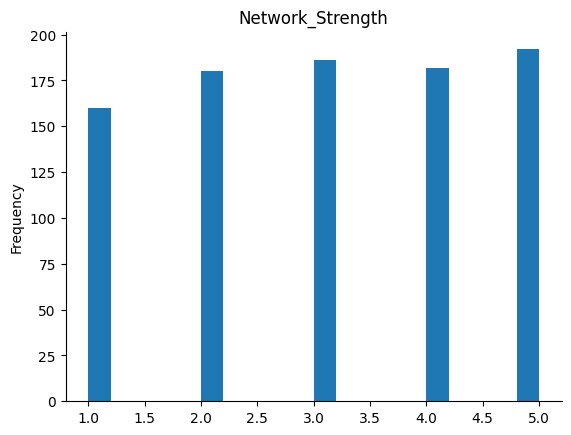

In [ ]:
# @title Network_Strength

from matplotlib import pyplot as plt
data['Network_Strength'].plot(kind='hist', bins=20, title='Network_Strength')
plt.gca().spines[['top', 'right',]].set_visible(False)

# Model Preparation

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Instantiate LabelEncoder
le = LabelEncoder()

# Convert categorical variables to numeric
for column in data.columns:
    if data[column].dtype == 'object':
        data[column] = le.fit_transform(data[column])

# Display DataFrame info
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900 entries, 0 to 899
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   Gender                900 non-null    int64
 1   College               900 non-null    int64
 2   Churn                 900 non-null    int64
 3   Level                 900 non-null    int64
 4   Residence             900 non-null    int64
 5   SIM_Usage             900 non-null    int64
 6   Usage_Freq            900 non-null    int64
 7   Network_Strength      900 non-null    int64
 8   Services_Used         900 non-null    int64
 9   Data_Exhaustion       900 non-null    int64
 10  Other_Networks        900 non-null    int64
 11  Use_Other_More        900 non-null    bool 
 12  Reasons_Other         900 non-null    int64
 13  Consider_Discontinue  900 non-null    int64
 14  Reasons_Discontinue   900 non-null    int64
 15  Additional_Feedback   900 non-null    int64
dtypes: bool(

Data Preparation



In [ ]:

# Split the data into features (X) and target (y)
X = data.drop('Churn', axis=1)
y = data['Churn']

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Logistic Regression


In [ ]:
# Initialize and fit the logistic regression model
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)

# Evaluate the model on the test set
y_pred_lr = lr_model.predict(X_test)
lr_accuracy = accuracy_score(y_test, y_pred_lr)
lr_precision = precision_score(y_test, y_pred_lr)
lr_recall = recall_score(y_test, y_pred_lr)
lr_f1 = f1_score(y_test, y_pred_lr)

print('Logistic Regression Results:')
print(f'Accuracy: {lr_accuracy:.2f}')
print(f'Precision: {lr_precision:.2f}')
print(f'Recall: {lr_recall:.2f}')
print(f'F1-Score: {lr_f1:.2f}')

Logistic Regression Results:
Accuracy: 0.58
Precision: 0.64
Recall: 0.51
F1-Score: 0.57


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Random Forest

In [ ]:
# Initialize and fit the random forest model
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)

# Evaluate the model on the test set
y_pred_rf = rf_model.predict(X_test)
rf_accuracy = accuracy_score(y_test, y_pred_rf)
rf_precision = precision_score(y_test, y_pred_rf)
rf_recall = recall_score(y_test, y_pred_rf)
rf_f1 = f1_score(y_test, y_pred_rf)

print('\nRandom Forest Results:')
print(f'Accuracy: {rf_accuracy:.2f}')
print(f'Precision: {rf_precision:.2f}')
print(f'Recall: {rf_recall:.2f}')
print(f'F1-Score: {rf_f1:.2f}')


Random Forest Results:
Accuracy: 0.50
Precision: 0.54
Recall: 0.47
F1-Score: 0.51


SVM model

In [ ]:
from sklearn.svm import SVC

# Split the data into features (X) and target (y)
X = data.drop('Churn', axis=1)
y = data['Churn']

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and fit the SVM model
svm_model = SVC(kernel='linear')  # You can try other kernels like 'rbf', 'poly', etc.
svm_model.fit(X_train, y_train)

# Evaluate the model on the test set
y_pred_svm = svm_model.predict(X_test)
svm_accuracy = accuracy_score(y_test, y_pred_svm)
svm_precision = precision_score(y_test, y_pred_svm)
svm_recall = recall_score(y_test, y_pred_svm)
svm_f1 = f1_score(y_test, y_pred_svm)

print('SVM Results:')
print(f'Accuracy: {svm_accuracy:.2f}')
print(f'Precision: {svm_precision:.2f}')
print(f'Recall: {svm_recall:.2f}')
print(f'F1-Score: {svm_f1:.2f}')

SVM Results:
Accuracy: 0.54
Precision: 0.59
Recall: 0.52
F1-Score: 0.55


Model Comparison and Interpretation

In [ ]:
# Compare the performance metrics of the models
models = ['Logistic Regression', 'Random Forest', 'SVM']
accuracies = [lr_accuracy, rf_accuracy, svm_accuracy]
precisions = [lr_precision, rf_precision, svm_precision]
recalls = [lr_recall, rf_recall, svm_recall]
f1_scores = [lr_f1, rf_f1, svm_f1]

model_performance = pd.DataFrame({
    'Model': models,
    'Accuracy': accuracies,
    'Precision': precisions,
    'Recall': recalls,
    'F1-Score': f1_scores
})

print('\nModel Performance:')
print(model_performance)

# Interpret the best model
best_model = model_performance.loc[model_performance['Accuracy'].idxmax(), 'Model']
print(f'\nThe best performing model for predicting student churn is {best_model}.')


Model Performance:
                 Model  Accuracy  Precision    Recall  F1-Score
0  Logistic Regression  0.583333   0.644737  0.505155  0.566474
1        Random Forest  0.500000   0.541176  0.474227  0.505495
2                  SVM  0.544444   0.588235  0.515464  0.549451

The best performing model for predicting student churn is Logistic Regression.


**Accuracy**: This is the ratio of the total number of correct predictions to the total number of predictions. It’s a good measure when the target variable **classes** in the data are nearly balanced.
**Precision**: This is the ratio of true positives (the number of items correctly labeled as belonging to the positive class) to the sum of true positives and false positives (items incorrectly labeled as belonging to the positive class). Precision is a good measure to determine when the costs of false positives are high.
**Recall (also known as Sensitivity or True Positive Rate):** bold textThis is the ratio of true positives to the sum of true positives and false negatives (items incorrectly labeled as belonging to the negative class). Recall is a good measure to determine when the costs of false negatives are high.
**F1-Score:** This is the harmonic mean of precision and recall. An F1 score reaches its best value at 1 (perfect precision and recall) and worst at 0. It’s a good measure when you want to balance precision and recall.

Correlation matrix:
                      Usage_Freq  Network_Strength  Services_Used  \
Usage_Freq              1.000000         -0.017889      -0.020940   
Network_Strength       -0.017889          1.000000       0.005727   
Services_Used          -0.020940          0.005727       1.000000   
Data_Exhaustion        -0.017482         -0.034613       0.020107   
Other_Networks         -0.047140          0.018495      -0.066899   
Use_Other_More         -0.017533         -0.007863      -0.005035   
Consider_Discontinue    0.030081          0.007980      -0.016453   
Reasons_Discontinue    -0.027329          0.000251      -0.069544   

                      Data_Exhaustion  Other_Networks  Use_Other_More  \
Usage_Freq                  -0.017482       -0.047140       -0.017533   
Network_Strength            -0.034613        0.018495       -0.007863   
Services_Used                0.020107       -0.066899       -0.005035   
Data_Exhaustion              1.000000        0.015473        0.017

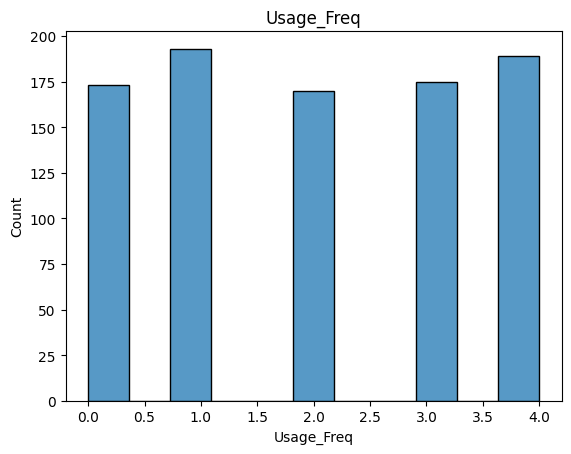

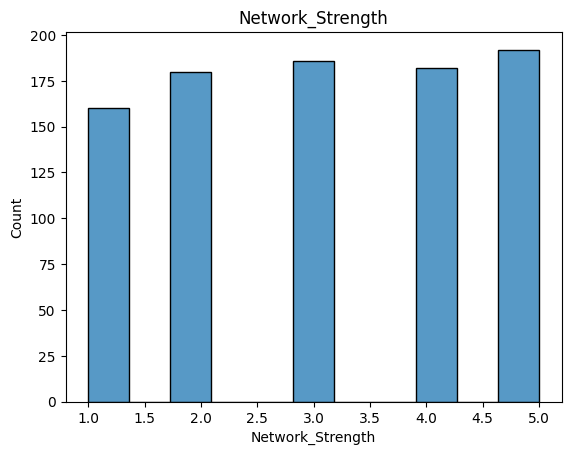

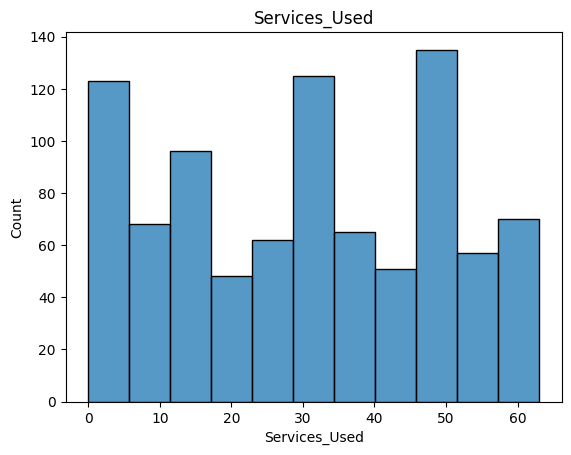

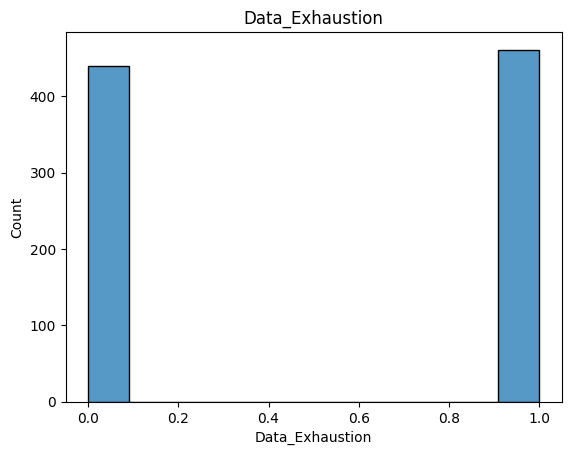

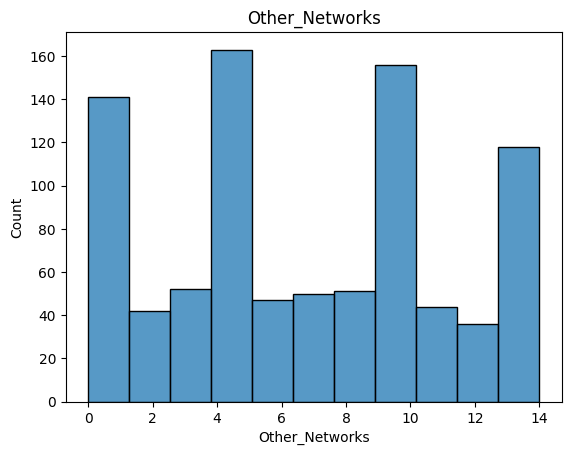

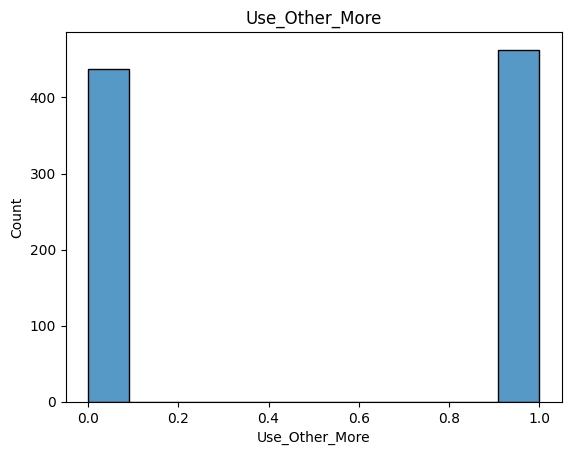

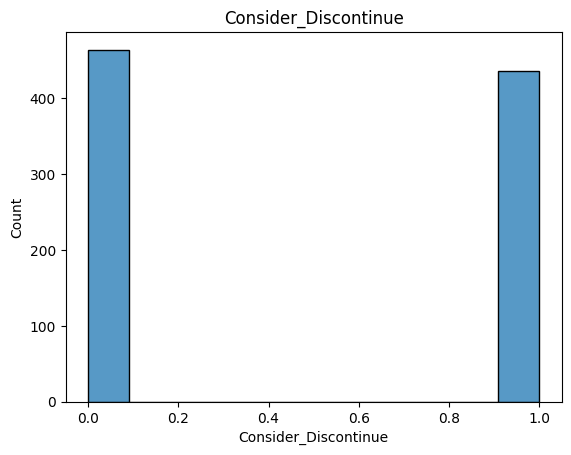

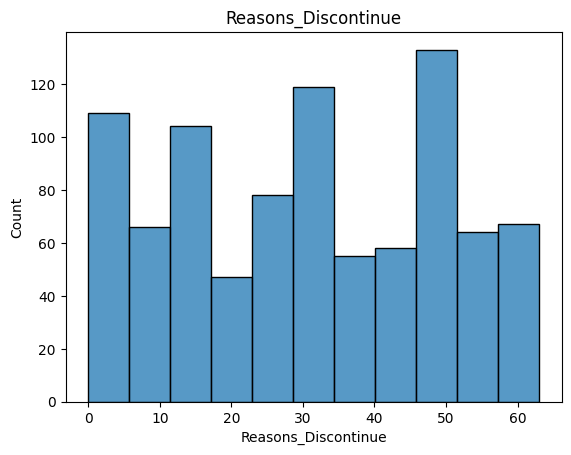

In [ ]:
# Select relevant columns
relevant_cols = ['Usage_Freq', 'Network_Strength', 'Services_Used', 'Data_Exhaustion',
                 'Other_Networks', 'Use_Other_More', 'Consider_Discontinue', 'Reasons_Discontinue']
X = data[relevant_cols]
y = data['Churn']

# Handle missing values
X = X.fillna(X.mean())

# Exploratory Data Analysis
print("Correlation matrix:")
print(X.corr())

# Visualize feature distributions
for col in X.columns:
    plt.figure()
    plt.title(col)
    sns.histplot(data=X, x=col)
    plt.show()


In [ ]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Preprocess data (if necessary)
# ... (e.g., scaling, encoding categorical variables)

# Train models
models = [LogisticRegression(), RandomForestClassifier(), SVC(kernel='linear')]
model_names = ['Logistic Regression', 'Random Forest', 'SVM']

for model, name in zip(models, model_names):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{name} Accuracy: {accuracy:.2f}")


Logistic Regression Accuracy: 0.52
Random Forest Accuracy: 0.43
SVM Accuracy: 0.54


In [ ]:
data.columns

Index(['Gender', 'College', 'Churn', 'Level', 'Residence', 'SIM_Usage',
       'Usage_Freq', 'Network_Strength', 'Services_Used', 'Data_Exhaustion',
       'Other_Networks', 'Use_Other_More', 'Reasons_Other',
       'Consider_Discontinue', 'Reasons_Discontinue', 'Additional_Feedback'],
      dtype='object')